# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Importing Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

In [208]:
df = pd.read_csv("day.csv")

In [209]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [210]:
df.shape

(730, 16)

In [211]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**No null values in any column(s)**

## Data Cleaning

### Drop unnessasary variables
- `instant` - index variale, so it doesn't make any siginficance for model, so we'll drop
- `dteday` - year ,month and weekday as separate columns, so we'll drop
- Since `casual` + `registered` = `cnt`, we'll drop `casual` and `registered` 

In [213]:
drop_columns = ["instant","dteday", 'casual','registered']
df.drop(drop_columns, inplace=True, axis=1)
df.shape

(730, 12)

### Detecting Outliers

In [214]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [215]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

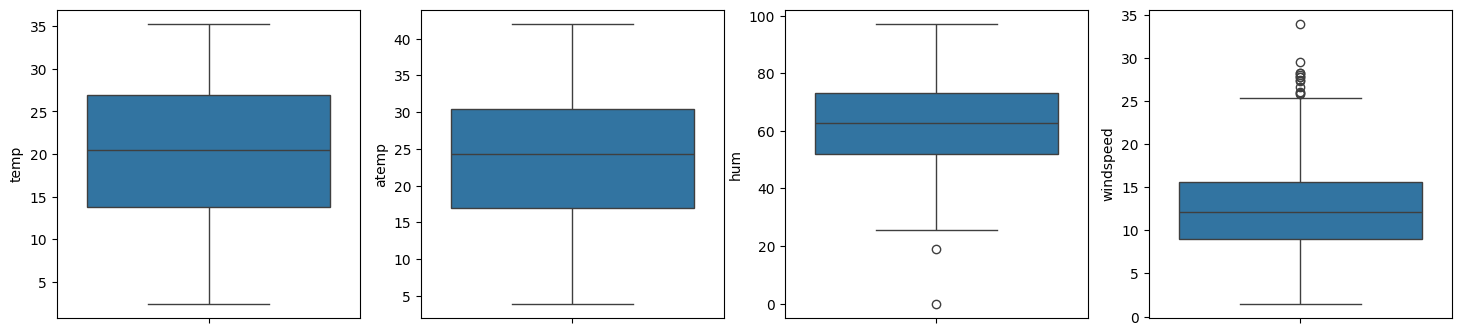

In [216]:
cont_col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

for i in range(len(cont_col)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=cont_col[i], data=df)

**There are no outliers**

## Data Visualization

### Continuos Variables (Scatter Plot)

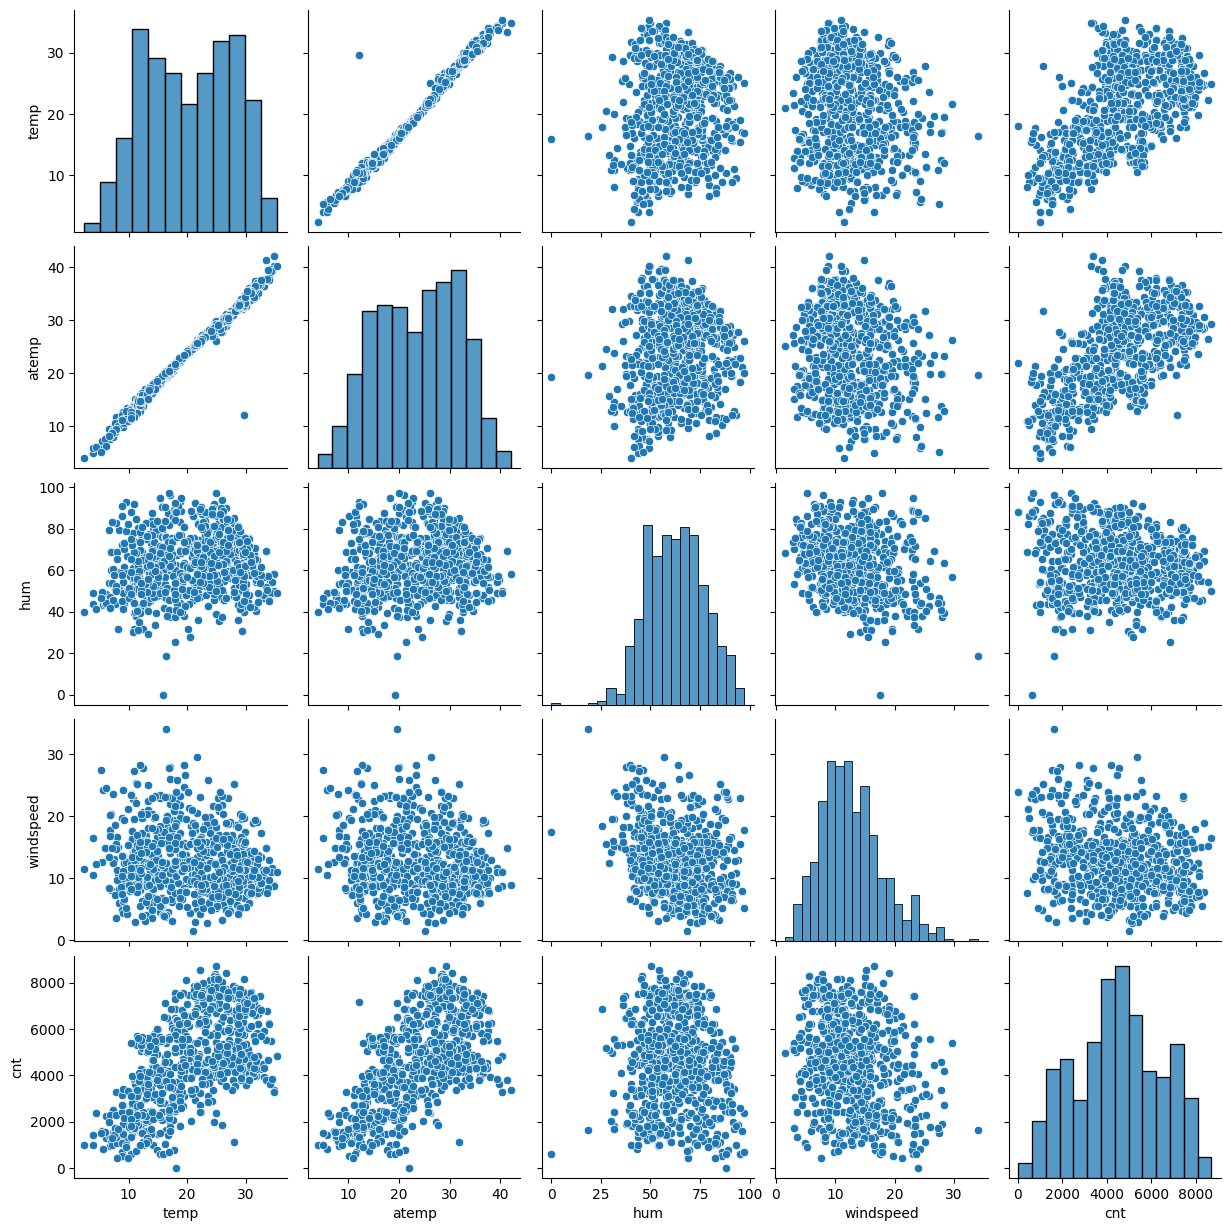

In [217]:
sns.pairplot(df[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

**There is a almost perfect linear between atemp and temp** 

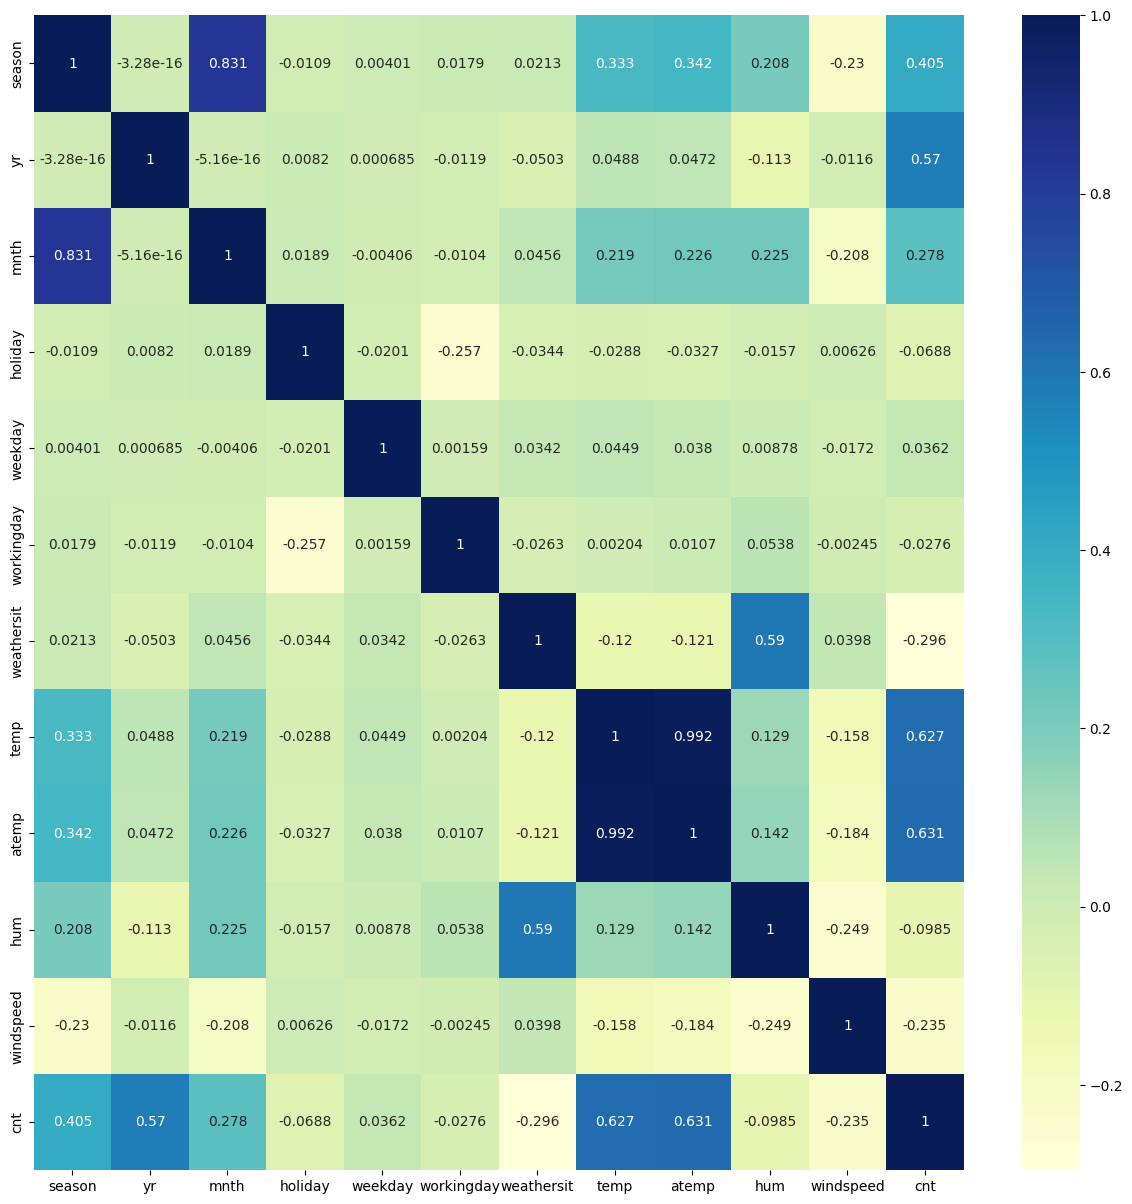

In [218]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

### Observation:

1) `atemp` is having highest correlation coefficient with `cnt` followed by `temp`.
2) `season` is correlated with `cnt` correlation coefficeint is decent. Neither too high nor too low.
3) `yr` is also corrleated with `cnt`. It can be a contributing factor.
4) `holiday` is negatively correlated with `cnt`.

### Categorical Variables (Box Plot)

In [219]:
palettes = [
    "deep",
    "muted",
    "bright",
    "pastel",
    "dark",
    "colorblind"
]

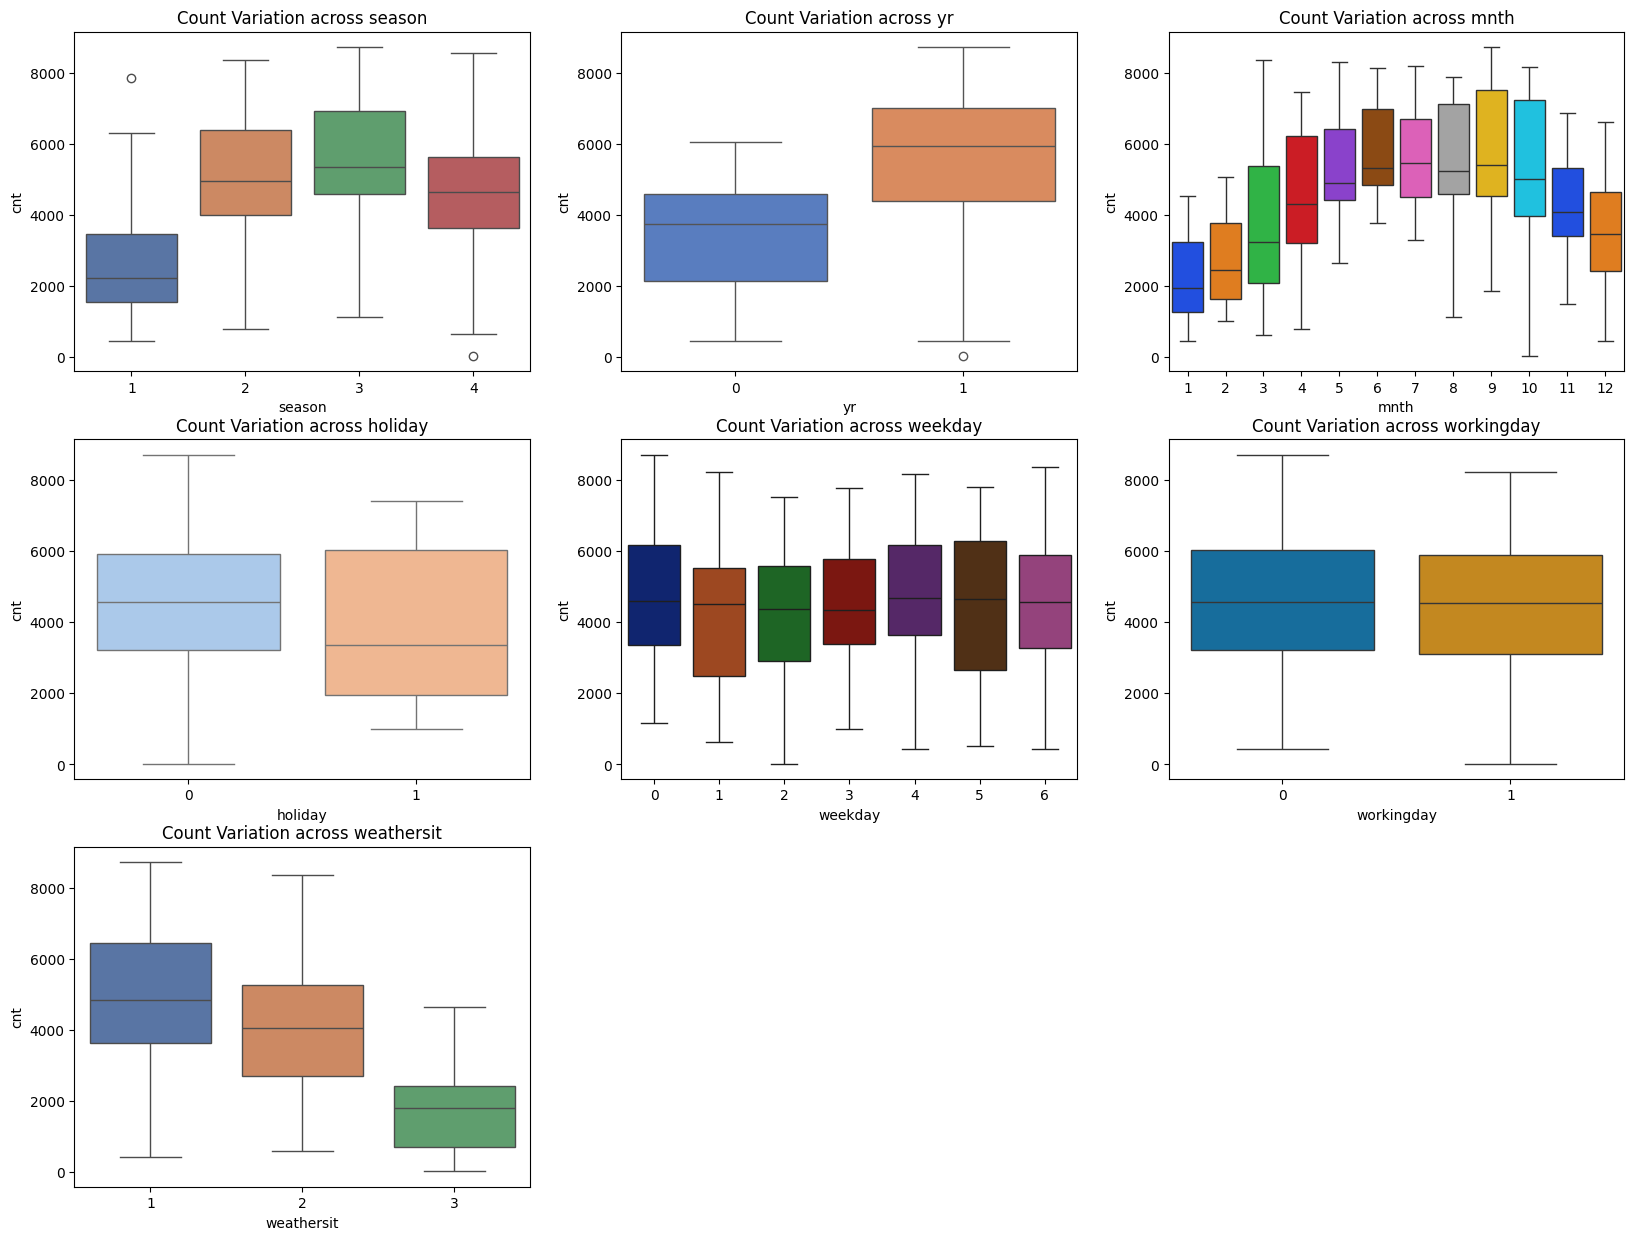

In [220]:
cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20,15))



for i in range(len(cat_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=cat_col[i], y="cnt" ,data=df, hue=cat_col[i], palette=palettes[i%6], legend=False)
    plt.title("Count Variation across " + cat_col[i])

plt.show()

### Observation:
- Count has increased significantly in 2019 compared to 2018.
- The distribution for working days (1) and non-working days (0) is almost identical, which means that the pattern of counts remains consistent regardless of whether it's a workday or not.
- Working Day / Non-Working Day shows almost similar behaviour
- The `mnth` plot clearly shows an upward trend in counts starting from May (month 5), peaking around July and August (months 7 and 8), and then tapering off after October (month 10). This could suggest higher activity or demand during the warmer months.
- Count is higher for fall(Autumn) and then followed by Summer.
-  Median counts remain fairly consistent across all `weekdays`. However, the variation (range of counts) does appear slightly higher for some days like Wednesday (3) and Sunday (0)

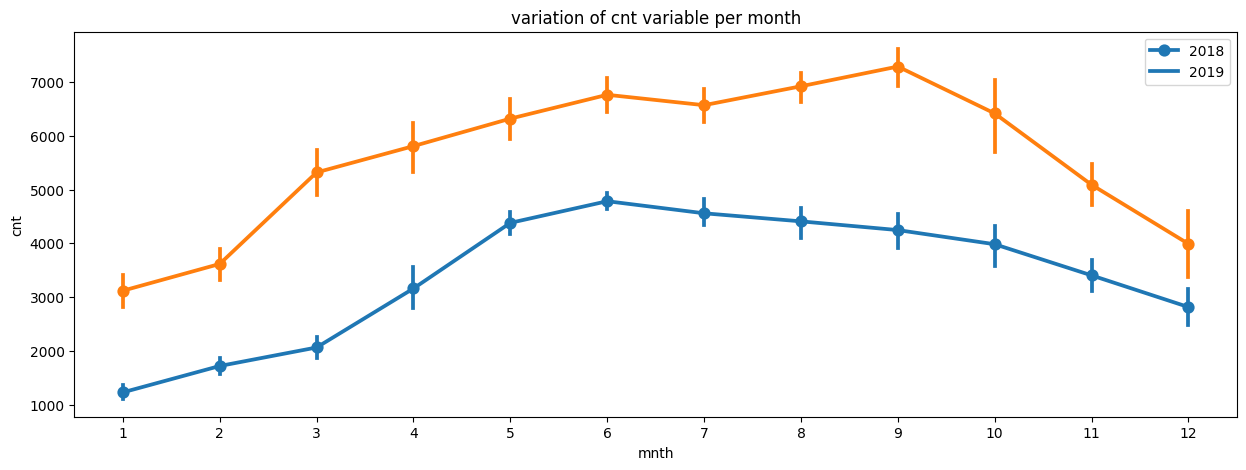

In [221]:
plt.figure(figsize=[15,5])
plt.title("variation of cnt variable per month")
sns.pointplot(data=df,x='mnth',y='cnt',hue='yr')
plt.legend(["2018","2019"])
plt.show()

In [222]:
df.shape

(730, 12)

## Creating Dummy Variables 

In [223]:
mapping_seasons = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mapping_month = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

mapping_day = {
    0 : 'sunday',
    1 : 'monday',
    2 : 'tuesday',
    3 : 'wednesday',
    4 : 'thursday',
    5 : 'friday',
    6 : 'saturday'
}

mapping_weathersit = {
    1 : 'clear',
    2 : 'moderate',
    3 : 'severe'
}

In [224]:
df.season.replace(mapping_seasons,inplace = True)

df.mnth.replace(mapping_month, inplace=True)

df.weekday.replace(mapping_day, inplace=True)

df.weathersit.replace(mapping_weathersit,inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [225]:
# Getting dummy variables from each column that we have mapped
season_dummy = pd.get_dummies(df["season"],dtype=int, drop_first = True)
weathersit_dummy = pd.get_dummies(df["weathersit"],dtype=int, drop_first = True)
mnth_dummy = pd.get_dummies(df["mnth"],dtype=int,drop_first = True)
day_dummy = pd.get_dummies(df["weekday"],dtype=int,drop_first = True)



In [226]:
dummy_vars = pd.concat([season_dummy, weathersit_dummy, mnth_dummy, day_dummy], axis = 1)
df = df.drop(columns=['season','mnth','weekday','weathersit'])

In [227]:
dummy_vars.head()

,spring,summer,winter,moderate,severe,august,december,february,january,july,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Adding Dummy Variables

In [228]:
df = pd.concat([df, dummy_vars],axis=1)

df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'moderate', 'severe', 'august',
       'december', 'february', 'january', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'monday', 'saturday', 'sunday',
       'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [229]:
df.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

In [433]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 300)

In [434]:
df_train.shape

(510, 30)

In [435]:
df_test.shape

(219, 30)

### Min-Max Scaling

In [436]:
# Scaling all the continuous variables in the range 0-1
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.shape

(510, 30)

In [437]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.696078,0.559712,0.525171,0.642654,0.411024,0.513308,0.245098,0.245098,...,0.084314,0.082353,0.084314,0.088235,0.150980,0.147059,0.131373,0.139216,0.141176,0.152941
std,0.500395,0.163554,0.460401,0.239185,0.221526,0.147058,0.189497,0.222862,0.430568,0.430568,...,0.278131,0.275172,0.278131,0.283915,0.358381,0.354512,0.338139,0.346511,0.348545,0.360284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356482,0.335987,0.525440,0.268535,0.362143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.561848,0.540014,0.641691,0.386730,0.522204,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.769634,0.709008,0.744633,0.513333,0.676542,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All continuos variables are scaled in the range 0-1**

In [438]:
# Getting response and predictor variables 
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building using Recursive Feature Elimination (RFE)

In [456]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm ,n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [457]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.False_, np.int64(14)),
 ('winter', np.True_, np.int64(1)),
 ('moderate', np.True_, np.int64(1)),
 ('severe', np.True_, np.int64(1)),
 ('august', np.False_, np.int64(13)),
 ('december', np.False_, np.int64(3)),
 ('february', np.False_, np.int64(6)),
 ('january', np.False_, np.int64(5)),
 ('july', np.True_, np.int64(1)),
 ('june', np.False_, np.int64(10)),
 ('march', np.False_, np.int64(8)),
 ('may', np.False_, np.int64(4)),
 ('november', np.False_, np.int64(2)),
 ('october', np.False_, np.int64(9)),
 ('september', np.True_, np.int64(1)),
 ('monday', np.False_, np.int64(11)),
 ('saturday', np.True_, np.int64(1)),
 ('sunday', np.True_, np.int64(1)),
 ('thursday', np.False_, np.int64(15)),
 ('t

In [458]:
support_col = X_train.columns[rfe.support_]
support_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'moderate', 'severe', 'july', 'september',
       'saturday', 'sunday'],
      dtype='object')

In [459]:
X_train.columns[~rfe.support_]

Index(['summer', 'august', 'december', 'february', 'january', 'june', 'march',
       'may', 'november', 'october', 'monday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

In [460]:
X_train_rfe = X_train[support_col]

In [461]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,353.12
3,temp,351.83
5,hum,38.24
2,workingday,38.03
13,saturday,8.28
14,sunday,7.73
6,windspeed,6.68
7,spring,3.42
9,moderate,2.41
8,winter,2.36


In [462]:


X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train,X_train_lm1).fit()  

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.92e-195
Time:                        19:00:35   Log-Likelihood:                 532.24
No. Observations:                 510   AIC:                            -1032.
Df Residuals:                     494   BIC:                            -964.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6171      0.097      6.383      0.0

**Dropping `atemp` because it has a high p-value and high VIF**

In [463]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [464]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,38.00
2,workingday,37.88
3,temp,19.38
12,saturday,8.27
13,sunday,7.70
5,windspeed,6.54
6,spring,3.42
8,moderate,2.41
7,winter,2.35
1,holiday,2.35


In [465]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.01e-195
Time:                        19:01:33   Log-Likelihood:                 531.46
No. Observations:                 510   AIC:                            -1033.
Df Residuals:                     495   BIC:                            -969.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6172      0.097      6.381      0.0

**`hum` has a very high VIF, so we will drop it**

In [466]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [467]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,22.58
3,temp,17.81
4,windspeed,6.18
11,saturday,5.61
12,sunday,5.10
5,spring,3.37
6,winter,2.24
0,yr,1.98
1,holiday,1.82
7,moderate,1.53


In [468]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [469]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.03e-193
Time:                        19:03:36   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -1020.
Df Residuals:                     496   BIC:                            -960.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5375      0.096      5.609      0.0

**`workingday` has a very high VIF, so we will drop it**

In [471]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [472]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.10
3,windspeed,5.03
0,yr,1.97
4,spring,1.80
6,moderate,1.49
5,winter,1.40
8,july,1.39
11,sunday,1.21
10,saturday,1.21
9,september,1.20


In [473]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [477]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.40e-193
Time:                        19:23:08   Log-Likelihood:                 519.82
No. Observations:                 510   AIC:                            -1014.
Df Residuals:                     497   BIC:                            -958.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2751      0.023     11.888      0.0

**The p-value and VIF seems to have acceptable p-value and VIF so we can finalize this model**

We can observe that:
 - R-squared: 84.6
 - Adjusted R-squared: 84.2

In [475]:
lr4.params

const        0.275118
yr           0.232158
holiday     -0.059647
temp         0.403067
windspeed   -0.124690
spring      -0.133714
winter       0.042698
moderate    -0.081479
severe      -0.266589
july        -0.060192
september    0.063921
saturday     0.026547
sunday       0.029816
dtype: float64

In [478]:
y_train_pred = lr4.predict(X_train_lm4) 

## Residual Analysis

Text(0.5, 0, 'Errors')

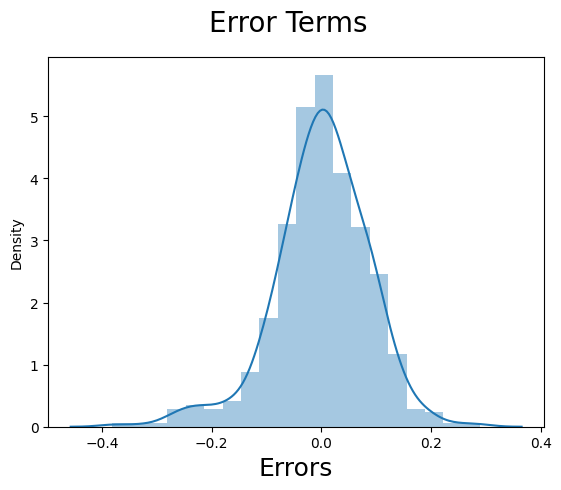

In [479]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

**The distribution of errors is Normal with mean 0, which satisfies the assumption of Multiple Linear Regression**

In [482]:
# Calculating RMSE

#Returns the mean squared error; we'll take a square root
print(round(np.sqrt(mean_squared_error(y_train, y_train_pred)),3))

0.087


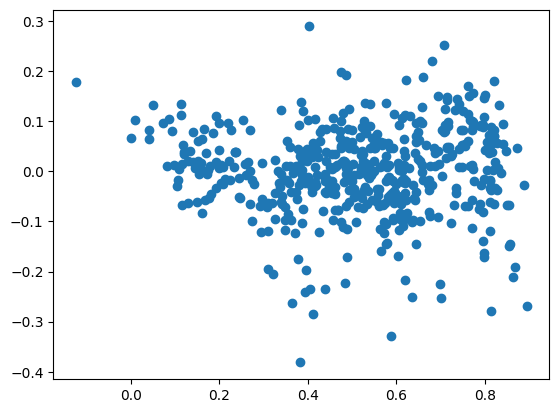

In [483]:
plt.scatter(y_train_pred,(y_train - y_train_pred))
plt.show()

**Residuals are independent and there is no correlation between the residuals and the predicted values**

## Making Prediction

In [484]:
# Scaling the test set

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.shape

(219, 30)

In [485]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.525114,0.031963,0.680365,0.569135,0.536613,0.656808,0.378012,0.522974,0.251142,0.269406,...,0.086758,0.082192,0.086758,0.068493,0.127854,0.132420,0.164384,0.150685,0.150685,0.118721
std,0.500513,0.176306,0.467403,0.228218,0.208893,0.145989,0.172753,0.223252,0.434663,0.444668,...,0.282125,0.275286,0.282125,0.253169,0.334692,0.339723,0.371472,0.358561,0.358561,0.324202
min,0.000000,0.000000,0.000000,0.048245,0.026455,0.193646,0.057872,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363471,0.349520,0.554315,0.266299,0.361194,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.595717,0.573409,0.661228,0.357540,0.520709,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.766677,0.707754,0.758909,0.484403,0.709388,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.035482,1.019437,1.002146,1.157215,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [486]:
# Splitting the test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [487]:
# Making sure the new X-test has same columns as those of X-train
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new) 

In [488]:
y_pred = lr4.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

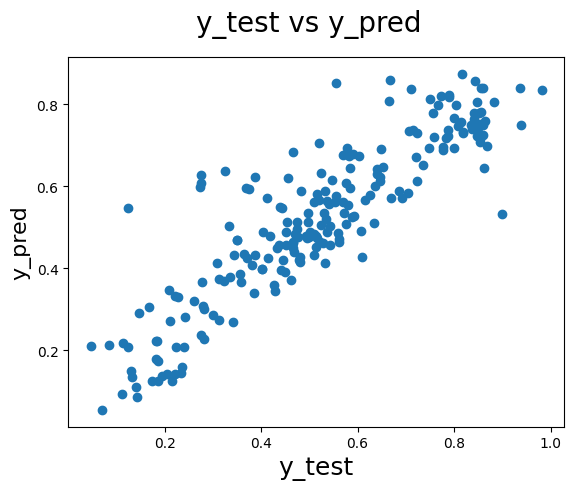

In [490]:
# Plotting y_test vs y_pred to understad the model performance on test dataset.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

In [491]:
R2 = r2_score(y_test, y_pred)
R2

0.7838104293814719

In [492]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7712168621609752

In [494]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.1035666328800533


## Conclusion

In [496]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":["84.6%","84.2%",0.087],
                         "Test Set":["78.38%","77.12%",0.104]})

summary_df

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,84.6%,78.38%
1,Adjusted R-Squared Value,84.2%,77.12%
2,RMSE,0.087,0.104


### Final model:

`cnt` = 0.275118 + 0.232158x`yr` - 0.059647x`holiday` + 0.403067x`temp` - 0.124690x`wind` -0.133714x`spring`+ 0.042698x`winter` - 0.081479x`moderate` - 0.266589x`severe` - 0.060192x`july` - 0.063921x`september` + 0.026547x`saturday` + 0.029816x`sunday-

The count of rental bikes can be predicted by the following predictors:
- yr
- holiday
- temp
- wind
- spring
- winter
- moderate (weather)
- severe (weather)
- july
- september
- saturday
- sunday